In [19]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

df_fake = pd.read_csv("fake.csv")
df_true = pd.read_csv("true.csv")

df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [29]:
print("\n ==== Começando a analisar quais paravras mais se repetem nos titulos de dataframes de fake news === ")
# juntando o texto

titulo_junto = ' '.join(df_fake['title']).lower()

# removendo pontuações e separando palavras
palavras = re.findall(r'\b\w+\b', titulo_junto)

#contando palavras
contagem_palavras = Counter(palavras)

print("\n A contagem com palavras pequenas nos titulos é: ", contagem_palavras.most_common(10))
# temos muitas palavras que não são importantes para a analise
# criando outra variavel que mostra palavras com mais de 4 letras
# motivo se da pois "Trump" tem 5 letras e é uma palavra importante para a analise

palavras_maiores = [palavras for palavras in palavras if len(palavras) > 4]

palavras_contagem_2 = Counter(palavras_maiores)

print("\n A segunda contagem com palavras maiores nos titulos é: ", palavras_contagem_2.most_common(10))
print("\n As  palavras que mais aparecem tem ligação politica, portanto, é o maior alvo de fake news")
print("\n Palavras apelativas como 'watch' e 'video'  também tem grande frequência nos titulos")


 ==== Começando a analisar quais paravras mais se repetem nos titulos de dataframes de fake news === 

 A contagem com palavras pequenas nos titulos é:  [('to', 9510), ('trump', 9338), ('video', 8477), ('s', 7712), ('the', 6306), ('of', 5168), ('for', 4833), ('in', 4718), ('a', 3786), ('on', 3688)]

 A segunda contagem com palavras maiores nos titulos é:  [('trump', 9338), ('video', 8477), ('obama', 2582), ('hillary', 2319), ('watch', 1937), ('about', 1699), ('after', 1556), ('president', 1146), ('clinton', 1138), ('black', 896)]

 As  palavras que mais aparecem tem ligação politica, portanto, é o maior alvo de fake news

 Palavras apelativas como 'watch' e 'video'  também tem grande frequência nos titulos


In [34]:
print("\n Analisando a repetição de palavras nos textos das fake news")
texto_junto = ' '.join(df_fake['text']).lower()

palavras_2 = re.findall(r'\b\w+\b', texto_junto)

contagem_palavras_2 = Counter(palavras_2)

print("\n A contagem de palavras pequenas nos textos de noticias é", contagem_palavras_2.most_common(10))

palavras_maiores = [palavras_2 for palavras_2 in palavras_2 if len(palavras_2) > 4]

palavras_contagem_2 = Counter(palavras_maiores)

print("\n A segunda contagem com palavras maiores nos textos é: ", palavras_contagem_2.most_common(10))
print("Assim como nos titulos, temos repetição de nomes politicos, porém, podemos notar a falta de palavras tendenciosas que tem nos titulos")


 Analisando a repetição de palavras nos textos das fake news

 A contagem de palavras pequenas nos textos de noticias é [('the', 543551), ('to', 290819), ('of', 236640), ('and', 226971), ('a', 214783), ('in', 171163), ('that', 151662), ('s', 141155), ('is', 111234), ('for', 93480)]

 A segunda contagem com palavras maiores nos textos é:  [('trump', 79300), ('about', 33025), ('their', 30290), ('president', 27715), ('people', 26570), ('would', 23562), ('there', 19923), ('clinton', 19173), ('obama', 18797), ('after', 17802)]
Assim como nos titulos, temos repetição de nomes politicos, porém, podemos notar a falta de palavras tendenciosas que tem nos titulos


In [44]:
# analisando os tipos de fake news mais aparentes
# media de fake news
fake_news_quantidade = df_fake['subject'].value_counts()
print("\n Quantidade de fake news em cada área:")
print(fake_news_quantidade)
print("Noticias segue sendo a maior vitima de fake news, um dado perigoso que pode trazer péssimas consequências")
print("Politica sendo o segundo assunto com maior quantidade de fake news, outro dado perigoso que pode redefinir campanhas eleitorais inteiras")



 Quantidade de fake news em cada área:
subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64
Noticias segue sendo a maior vitima de fake news, um dado perigoso que pode trazer péssimas consequências
Politica sendo o segundo assunto com maior quantidade de fake news, outro dado perigoso que pode redefinir campanhas eleitorais inteiras


Grande volume de noticias falsas entre maio e junho em 2016 e no mesmo período em 2017
Após pesquisas, em 2016 no período tivemos Eleição Presidencial de Trump vs. Hillary Clinton(nomes presentes nos titulos com mais fake news)
Em 2017 tivemos a noticia que o FBI abriu uma investigação oficial sobre a influência russa nas eleições
Ao mesmo tempo, veículos pró-Trump criavam 'fake news' para desacreditar investigações contra ele.


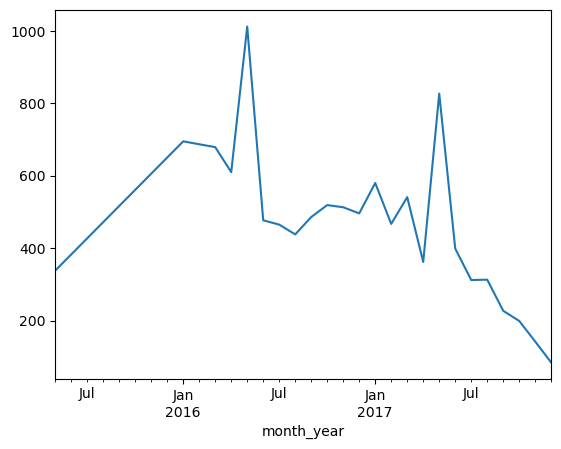

In [51]:
# analisando a variação de artigos com o tempo
df_fake['date'] = pd.to_datetime(df_fake['date'], errors='coerce')
df_fake['month_year'] = df_fake['date'].dt.to_period("M")
df_fake['month_year'].value_counts().sort_index().plot(kind='line')
print("Grande volume de noticias falsas entre maio e junho em 2016 e no mesmo período em 2017")
print("Após pesquisas, em 2016 no período tivemos Eleição Presidencial de Trump vs. Hillary Clinton(nomes presentes nos titulos com mais fake news)")
print("Em 2017 tivemos a noticia que o FBI abriu uma investigação oficial sobre a influência russa nas eleições")
print("Ao mesmo tempo, veículos pró-Trump criavam 'fake news' para desacreditar investigações contra ele.")

In [52]:
# identificando um padrão nos titulos de fake news
# verificando o tamanho dos titulos falsos

df_fake['title_length'] = df_fake['title'].apply(len)
df_fake['text_length'] = df_fake['text'].apply(len)
print(df_fake[['title_length', 'text_length']].describe())



       title_length   text_length
count  23481.000000  23481.000000
mean      94.198032   2547.396235
std       27.184433   2532.884399
min        8.000000      1.000000
25%       77.000000   1433.000000
50%       90.000000   2166.000000
75%      105.000000   3032.000000
max      286.000000  51794.000000


In [55]:
# verificando tamanho de titulos com noticias verdadeiras

df_true['title_length'] = df_true['title'].apply(len)
df_true['text_length'] = df_true['text'].apply(len)
print(df_true[['title_length', 'text_length']].describe())

print("Uma noticia boa e verdadeira, noticias verdadeiras tem titulos consideravelmente menores")

       title_length   text_length
count  21417.000000  21417.000000
mean      64.667881   2383.278517
std        9.168999   1684.835730
min       26.000000      1.000000
25%       59.000000    914.000000
50%       64.000000   2222.000000
75%       70.000000   3237.000000
max      133.000000  29781.000000
Uma noticia boa e verdadeira, noticias verdadeiras tem titulos consideravelmente menores


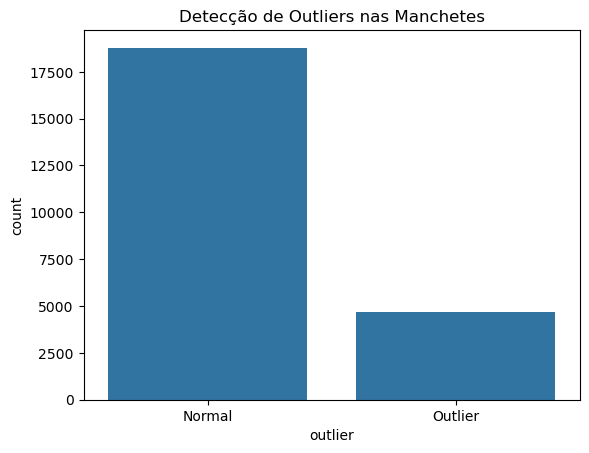


 Manchetes identificadas como outliers:
                                                   title
4       Pope Francis Just Called Out Donald Trump Dur...
5       Racist Alabama Cops Brutalize Black Boy While...
18      SNL Hilariously Mocks Accused Child Molester ...
21      KY GOP State Rep. Commits Suicide Over Allega...
26      Accused Child Molesting Senate Candidate Roy ...
...                                                  ...
23425  UN Physically Removes Independent Media From N...
23465  ‘There’ll be boots on the ground’: US making n...
23467  Oregon Governor Says Feds ‘Must Act’ Against P...
23472                      #Hashtag Hell & The Fake Left
23474          The New American Century: An Era of Fraud

[4696 rows x 1 columns]
Após analises podemos notar que poucas matérias tem textos com outliers nos seus titulos


In [24]:
# iniciando a detecção de outliers
# Pré-processamento dos textos
# Convertendo as manchetes para minúsculas e removendo caracteres especiais
df_fake['clean_headline'] = df_fake['title'].str.lower().str.replace('[^a-z\\s]', '', regex=True)

# Vetorização dos textos
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_fake['clean_headline'])

# Detectando outliers
iso_forest = IsolationForest(contamination=0.2, random_state=42)
df_fake['outlier'] = iso_forest.fit_predict(X)

# A coluna 'outlier' terá valores 1 (não outlier) e -1 (outlier)
df_fake['outlier'] = df_fake['outlier'].map({1: 'Normal', -1: 'Outlier'})

# resultados em graficos
sns.countplot(data=df_fake, x='outlier')
plt.title('Detecção de Outliers nas Manchetes')
plt.show()

# Exibindo as manchetes que foram detectadas como outliers
outliers = df_fake[df_fake['outlier'] == 'Outlier']
print("\n Manchetes identificadas como outliers:")
print(outliers[['title']])
print("Após analises podemos notar que poucas matérias tem textos com outliers nos seus titulos")